# Insurance Claim Fraud Detection
Problem Statement:

Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
df = pd.read_csv("Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

The dataset contains 1000 rows and 40 columns. And out of 40 columns, 39 are independent columns and remaining 1 is the target variable "fraud_reported".



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

This gives the information about the dataset which includes indexing type,column type, non null values and memory usage.

Here the column_c39 has 0 non null values which means it has one unique value throughout the data so we can drop this column.

In [5]:
# Dropping _c39 column
df.drop("_c39",axis=1,inplace=True)

In [6]:
# Checking null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

None of the columns in the dataset contains any null values.

In [7]:
# Checking the type of dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The dataset contains 3 different types of data namely integer datatype, float datatype and object datatype.

In [8]:
# Checking the number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [9]:
df=df.drop(columns=['policy_number','incident_location','policy_bind_date','umbrella_limit','insured_zip','incident_date'],axis=1)

We can observe the columns policy_number and incident_location have 1000 unique values which means they have only one value count.So it is not required for prediction and we can drop it.Also dropping uneccesary columns.

In [10]:
# Checking which column contains "?"
df[df.columns[(df=="?").any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

These are the columns which contains "?" sign. Since these columns seems to be categorical so we will replcae "?" values with most frequent occuring values of the respective columns that is their mode values.`

In [11]:
# Replacing "?" by their mode values
df['collision_type'] = df.collision_type.str.replace('?', df['collision_type'].mode()[0])
df['property_damage'] = df.property_damage.str.replace('?', "NO")
df['police_report_available'] = df.police_report_available.str.replace('?', "NO")

In [12]:
# Extracting csl_per_person and csl_per_accident from policy_csl column
df['csl_per_person'] = df.policy_csl.str.split('/',expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/',expand=True)[1]

In [13]:
# Converting object datatype into integer data type
df['csl_per_person']=df['csl_per_person'].astype('int64')
df['csl_per_accident']=df['csl_per_accident'].astype('int64')

In [14]:
# Since we have extracted the data type from policy_csl, lets drop that column
df.drop("policy_csl",axis=1,inplace=True)

In [15]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Vehicle_Age']=2018-df['auto_year']
df.drop("auto_year",axis=1,inplace=True)

Here we have extracted age of the vehicle on the basis of auto yeat by assuming the data is collected in the year 2018.

In [16]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,Vehicle_Age
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,71610,6510,13020,52080,Saab,92x,Y,250,500,14
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,5070,780,780,3510,Mercedes,E400,Y,250,500,11
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,34650,7700,3850,23100,Dodge,RAM,N,100,300,11
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,63400,6340,6340,50720,Chevrolet,Tahoe,Y,250,500,4
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,6500,1300,650,4550,Accura,RSX,N,500,1000,9


In [17]:
# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)
print("\n")

Categorical columns are:
 ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical columns are:
 ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'csl_per_person', 'csl_per_accident', 'Vehicle_Age']




In [18]:
# Checking the unique values of target 
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [19]:
# Cehcking the list of counts of target
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

From the value counts we can notice that the data is not balanced. So we can use ovesampling method to balance the data before building the models.

# Description of Dataset

In [20]:
# statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,203.95400,115.113174,0.00,115.7500,199.5,276.250,479.00
age,1000.0,38.94800,9.140287,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1136.00000,611.864673,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
capital-gains,1000.0,25126.10000,27872.187708,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-26793.70000,28104.096686,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,11.64400,6.951373,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.83900,1.018880,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,0.99200,0.820127,0.00,0.0000,1.0,2.000,2.00
witnesses,1000.0,1.48700,1.111335,0.00,1.0000,1.0,2.000,3.00


This gives the statistical information of the numerical columns present in the dataframe. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

Here the counts of all the columns are equal which means there are no missing values in the dataset.

In some of the columns like policy_deductable, capital-gains, injury_claim etc we can observe the mean value is greater than the median(50%) which means the data in those columns are skewed to right.

And in some of the columns like total_claim_amount, vehicle_claim...etc we can observe the median is greater than the mean which means the data in the columns are skewed to left.

And some of the columns have equal mean and median that means the data symmetric and is normally distributed and no skewness present.

There is a huge difference in 75% and max it shows that huge outliers present in the columns.

# EDA

### Univariate Analysis

N    753
Y    247
Name: fraud_reported, dtype: int64


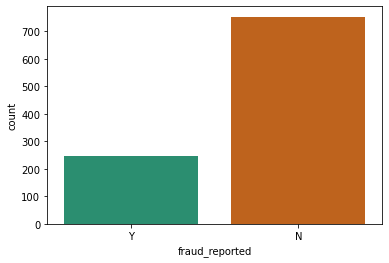

In [21]:
# Visualizing how many insurance claims is fraudulent
print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'],palette='Dark2')
plt.show()

N    753
Y    247
Name: fraud_reported, dtype: int64


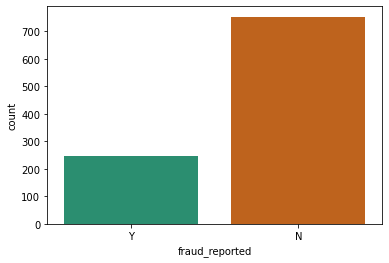

In [22]:
# Visualizing how many insurance claims is fraudulent
print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'],palette='Dark2')
plt.show()

N    753
Y    247
Name: fraud_reported, dtype: int64


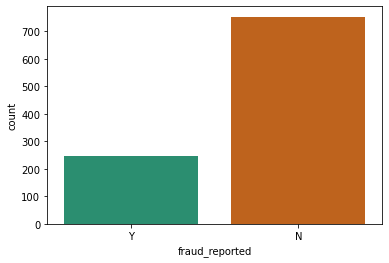

In [23]:
# Visualizing how many insurance claims is fraudulent
print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'],palette='Dark2')
plt.show()

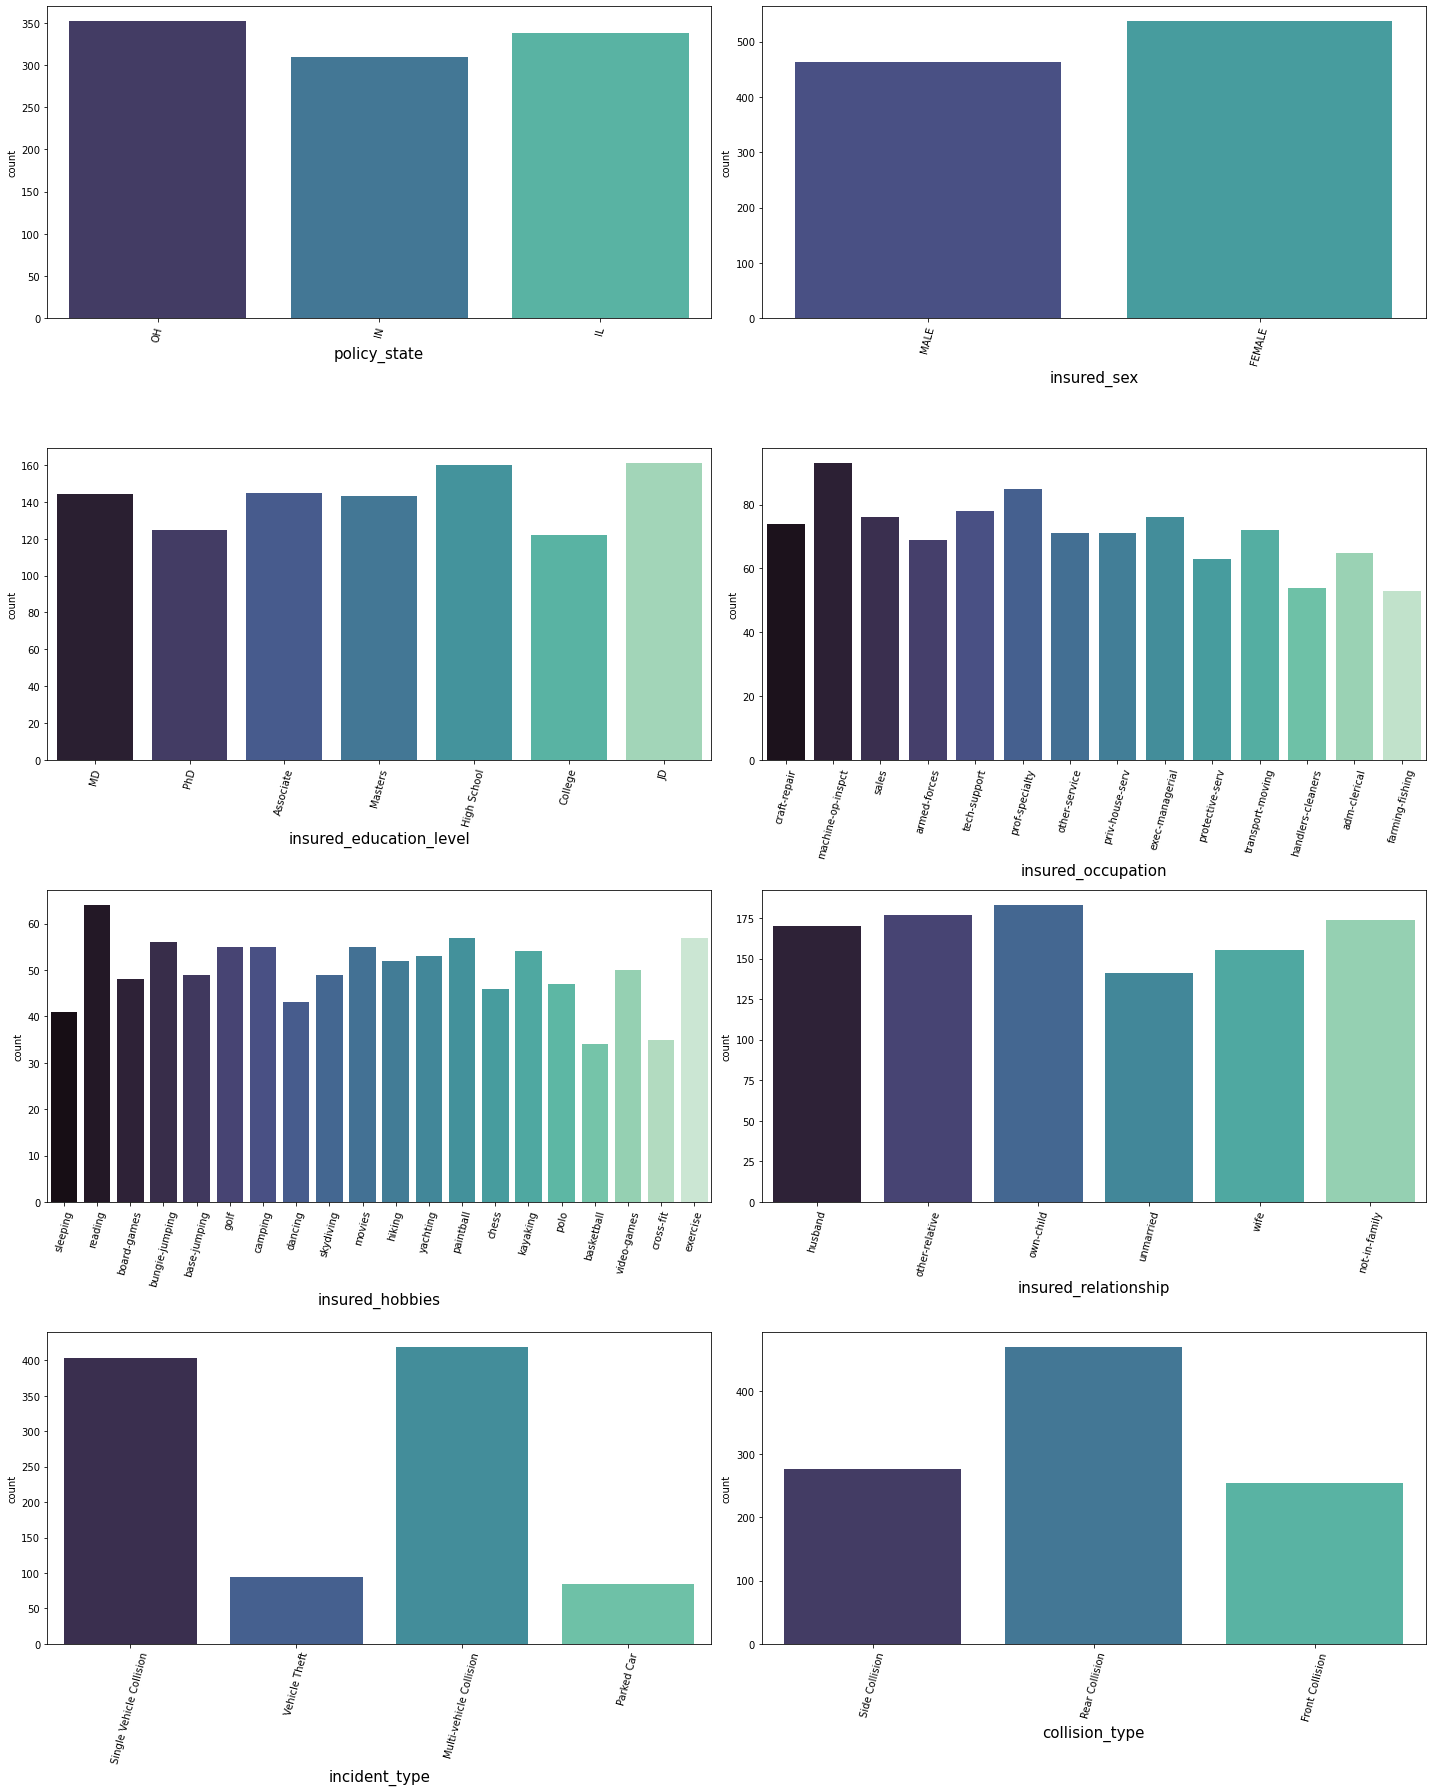

In [24]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in categorical_col:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[col],palette="mako")
        plt.xticks(rotation=75)
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()


# Distribution of skewness

### Plotting numerical columns.

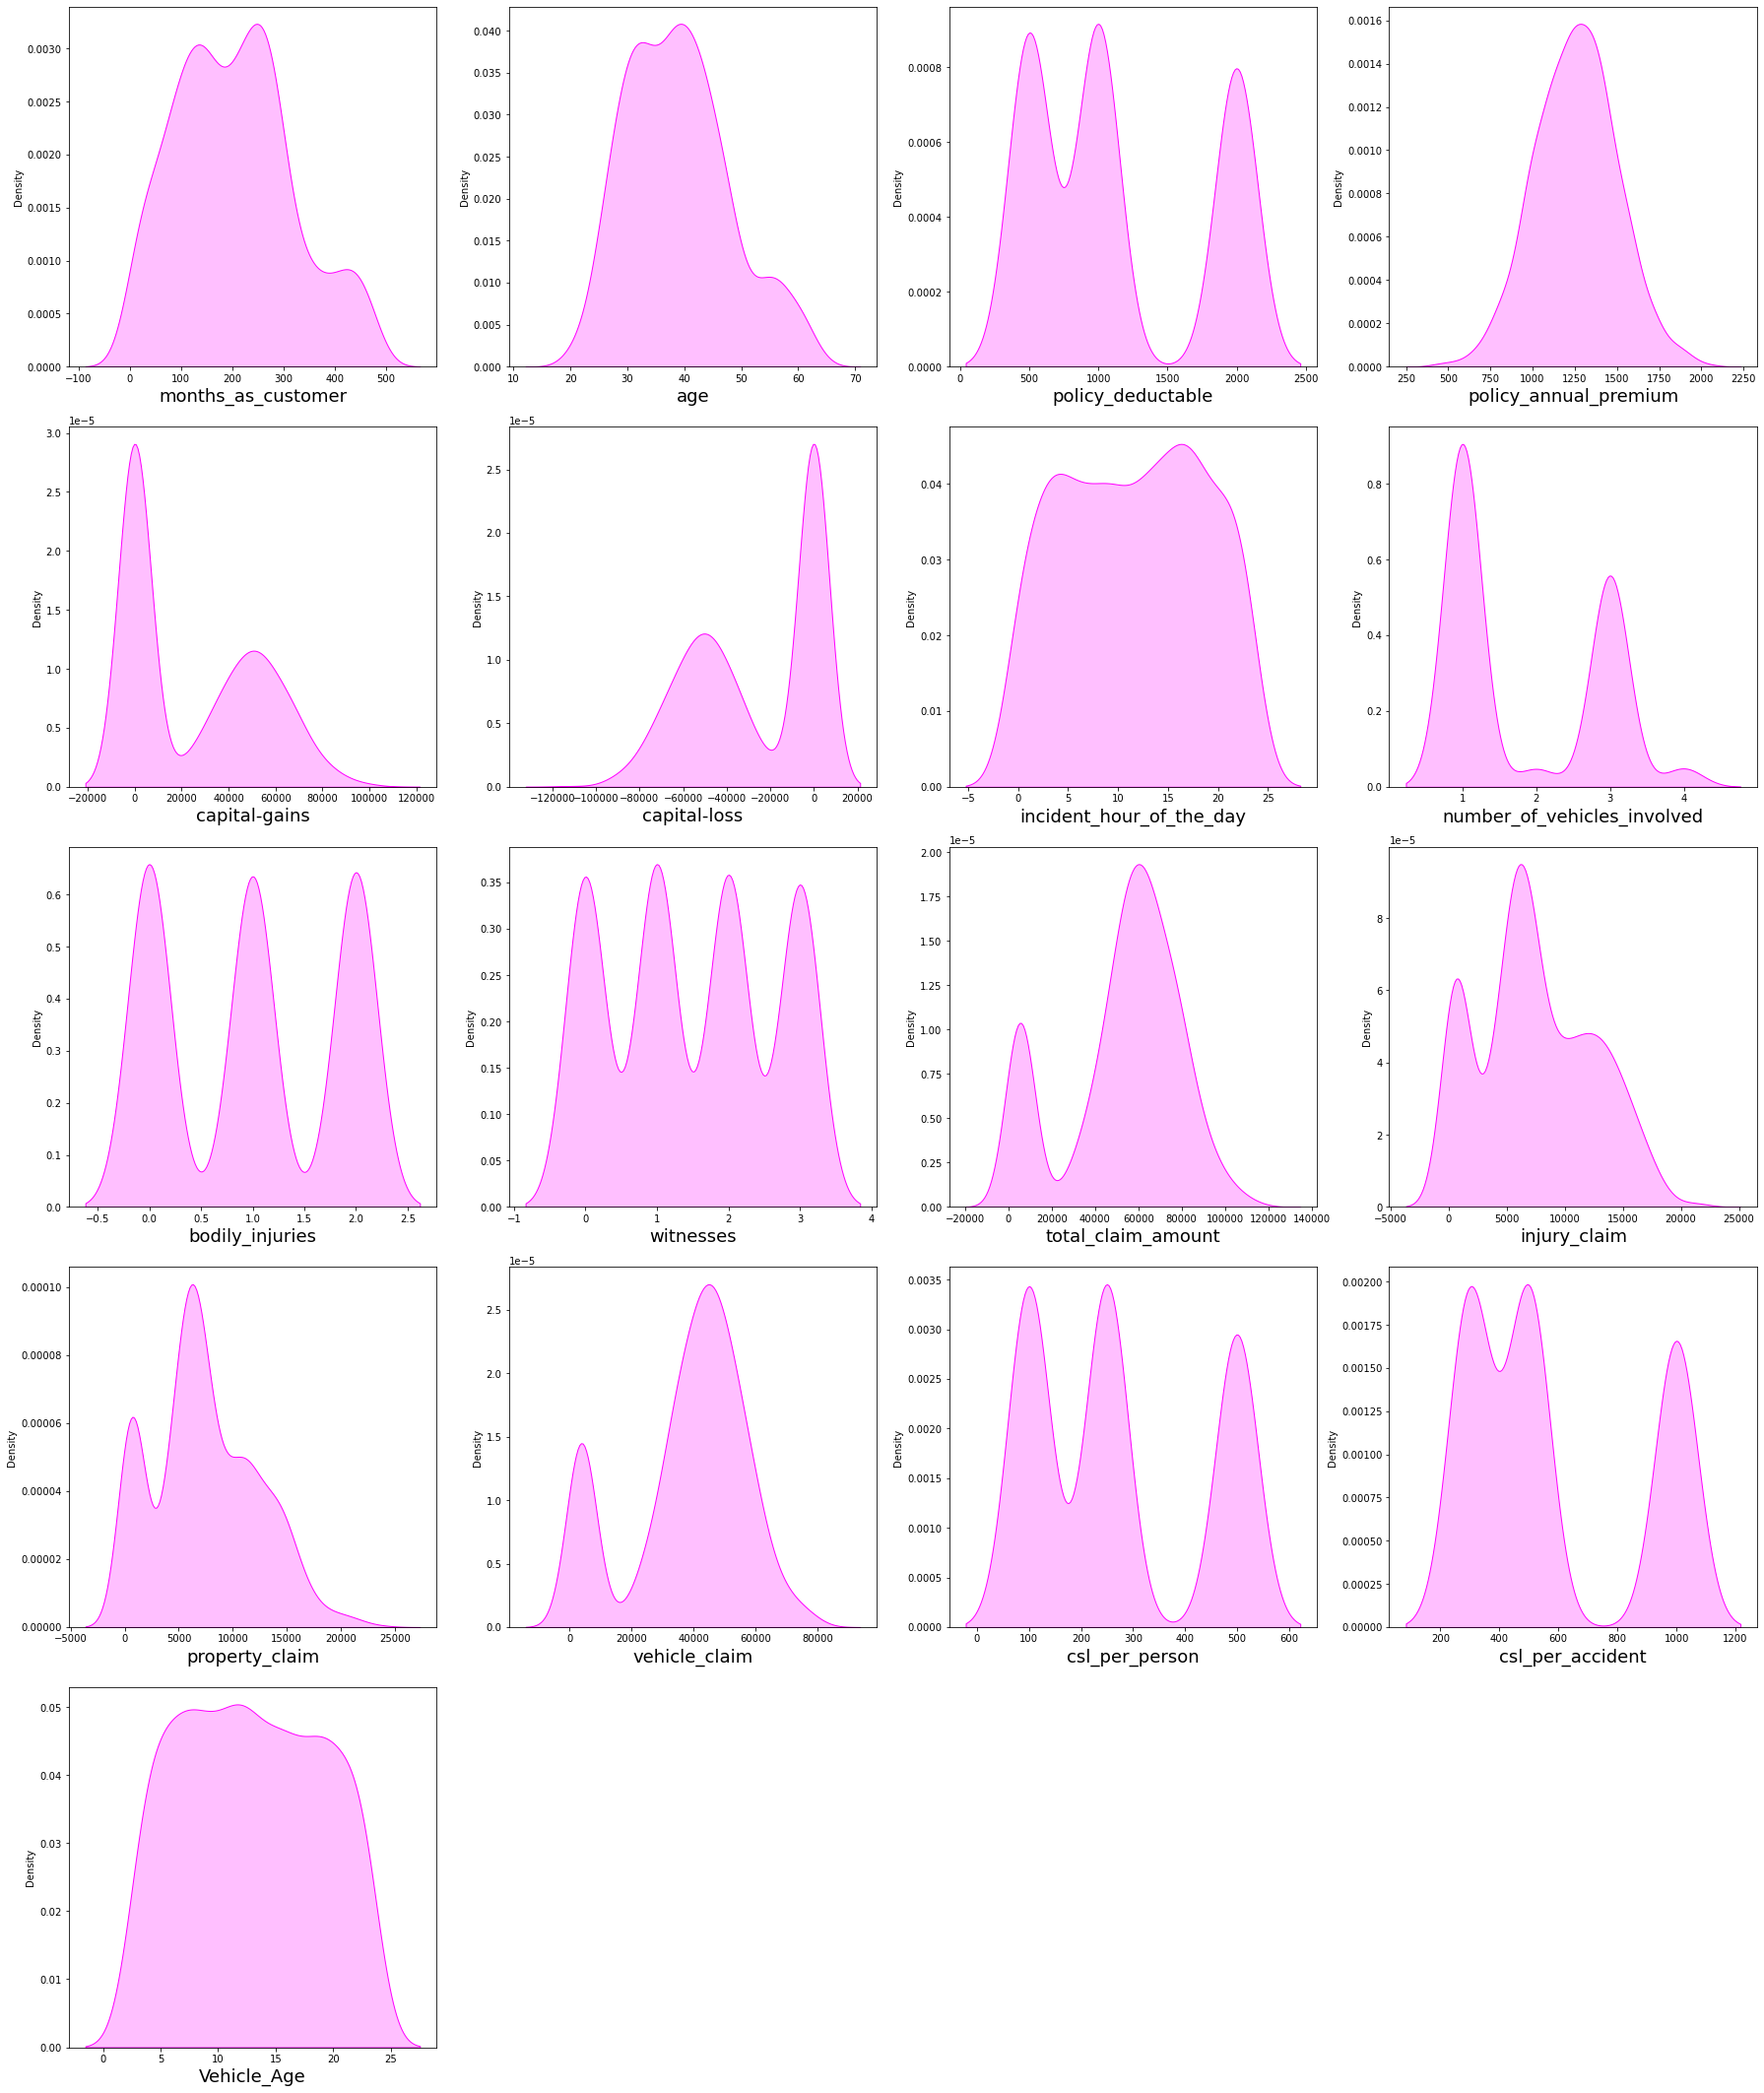

In [25]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="magenta",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

Above are the distribution plots for all the numerical columns. From the distplots we can observe the following:

1)The data is normally distributed in most of the columns.

2)Some of the columns like capital-gains and incident_months have mean value greater than the median, hence it is skewed to the right.

3)The data in the column capital loss is skewed to left.

### Bivariate Analysis

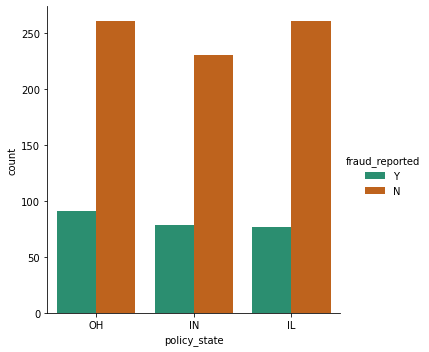

In [26]:
# Comparing policy_state and fraud_reported
sns.factorplot('policy_state',kind='count',data=df,hue='fraud_reported',palette='Dark2')
plt.show()

Fraud report is high in "OH" policy_state.

<Figure size 1152x648 with 0 Axes>

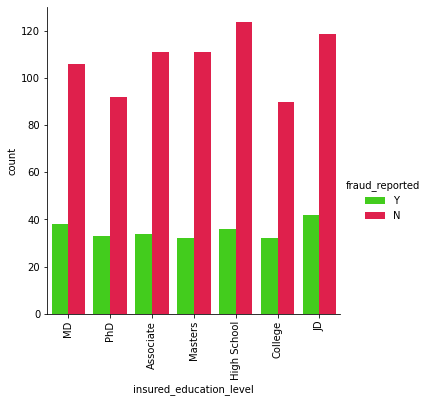

In [27]:
# Comparing insured_education_level and fraud_reported
plt.figure(figsize=(16,9))
sns.factorplot('insured_education_level',kind='count',data=df,hue='fraud_reported',palette='prism')
plt.xticks(rotation=90)

plt.show()

The fraudulent level is very less for the people who have high scool education and the people who have completed thier "JD" education have high fruad report.The people who have high insured education are facing insurance fruadulent compared to the people with less insured education level.

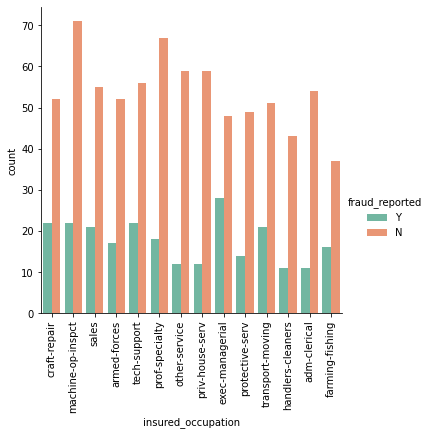

In [28]:
# Comparing insured_occupation and fraud_reported
sns.factorplot('insured_occupation',kind='count',data=df,hue='fraud_reported',palette="Set2")
plt.xticks(rotation=90)
plt.show()


The people who are in the position exec-managerials have high fraud reports compared to others.

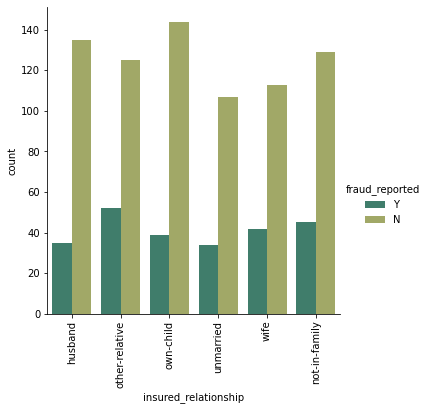

In [29]:
# Comparing insured_hobbies and fraud_reported
sns.factorplot('insured_relationship',kind='count',data=df,hue='fraud_reported',palette='gist_earth')
plt.xticks(rotation=90)
plt.show()

The fraud report is high for the customers who have other relative and it is less for unmarried people.

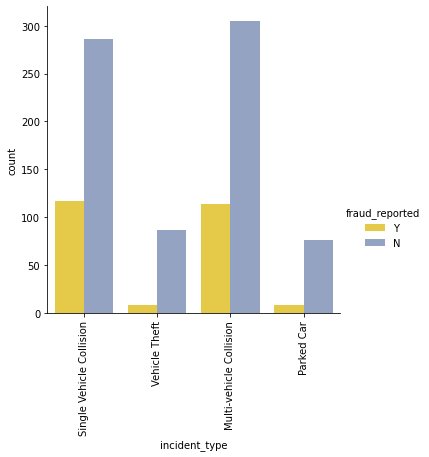

In [30]:
# Comparing incident_type and fraud_reported
sns.factorplot('incident_type',kind='count',data=df,hue='fraud_reported',palette="Set2_r")
plt.xticks(rotation=90)
plt.show()

In Multivehicle collision and single vehicle collision, the fraud report is very high compared to others.

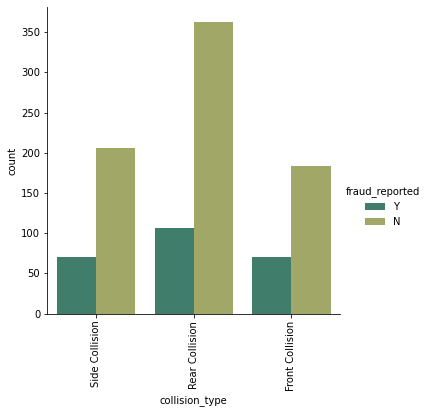

In [31]:
#Comparing collision_type and fraud_reported
sns.factorplot('collision_type',kind='count',data=df,hue='fraud_reported',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

The fraud level is high in the collision type Rear Collision and other two collision type have average reports.

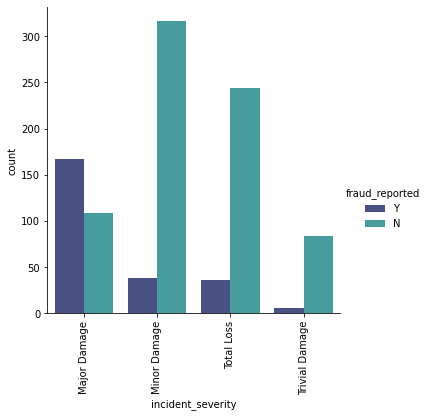

In [32]:
# Comparing incident_severity and fraud_reported
sns.factorplot('incident_severity',kind='count',data=df,hue='fraud_reported',palette="mako")
plt.xticks(rotation=90)
plt.show()

The fraud report is high in Major damage incident severity and for Trivial Damage the report is less compared to others.

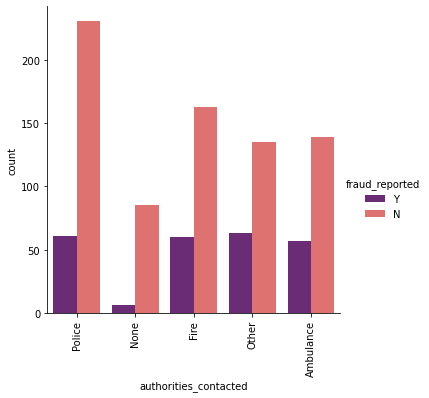

In [33]:
# Comparing authorities_contacted and fraud_reported
sns.factorplot('authorities_contacted',kind='count',data=df,hue='fraud_reported',palette="magma")
plt.xticks(rotation=90)
plt.show()


The police contacted cases are very high and the fraud report is in equal for all the authorities except None.

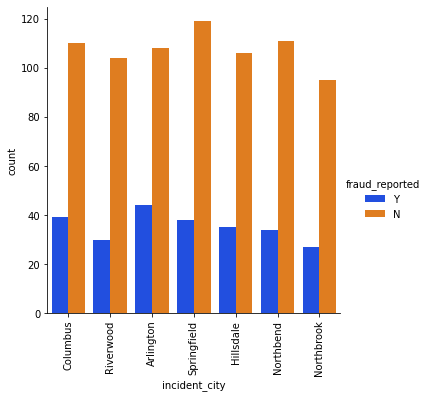

In [34]:
# Comparig incident_city and fraud_reported
sns.catplot('incident_city',kind='count',data=df,hue='fraud_reported',palette="bright")
plt.xticks(rotation=90)
plt.show()

The cities Riverwood and Northbrook have very less fraud reports compared to others.

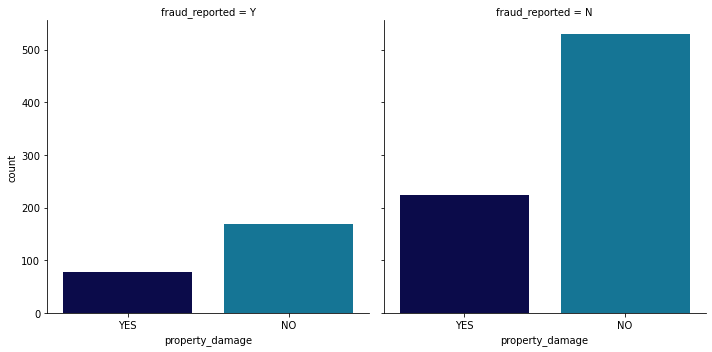

In [35]:
# Comparing property_damage and fraud_reported
sns.factorplot('property_damage',kind='count',data=df,col='fraud_reported',palette="ocean")
plt.show()

The customers who do not have any property damage case they have high fraud reports.

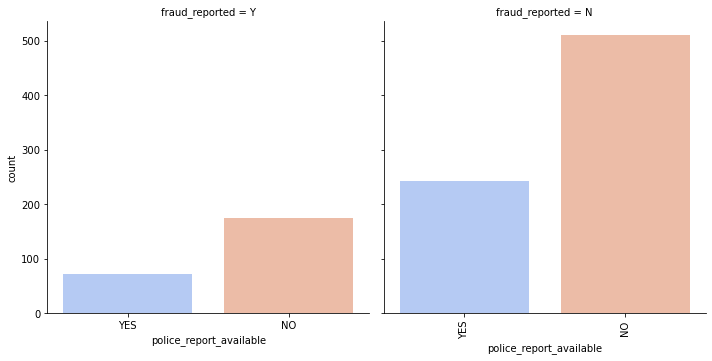

In [36]:
# Comparing police_report_available and fraud_reported
sns.factorplot('police_report_available',kind='count',data=df,col='fraud_reported',palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

If there is no police report available then the fraud report is very high.

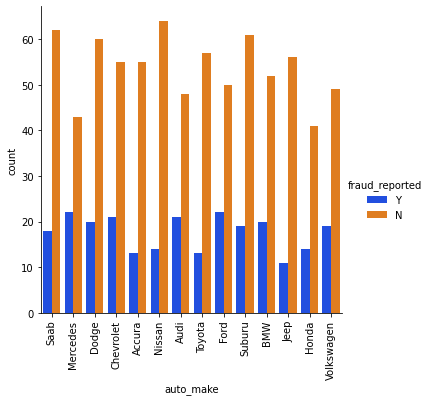

In [37]:
# Comparing auto_make and fraud_reported
sns.catplot('auto_make',kind='count',data=df,hue='fraud_reported',palette="bright")
plt.xticks(rotation=90)
plt.show()

In all the auto make cases the fraud report is almost same

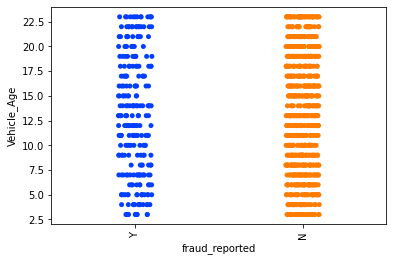

In [38]:
# Comparing  Vehicle_Age and fraud_reported
sns.stripplot(y='Vehicle_Age',x='fraud_reported',data=df,palette="bright")
plt.xticks(rotation=90)
plt.show()

There is no significant difference between the features

### Now using encoder to encode the target variable

In [39]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

for i in categorical_col:
    df[i]=enc.fit_transform(df[i])
    

In [40]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount               int64
injury_claim             

We can say that all categorical columns are encoded into numerical

# Multivariate Analysis

### Checking for Corrrelation(Plotting Heatmap)

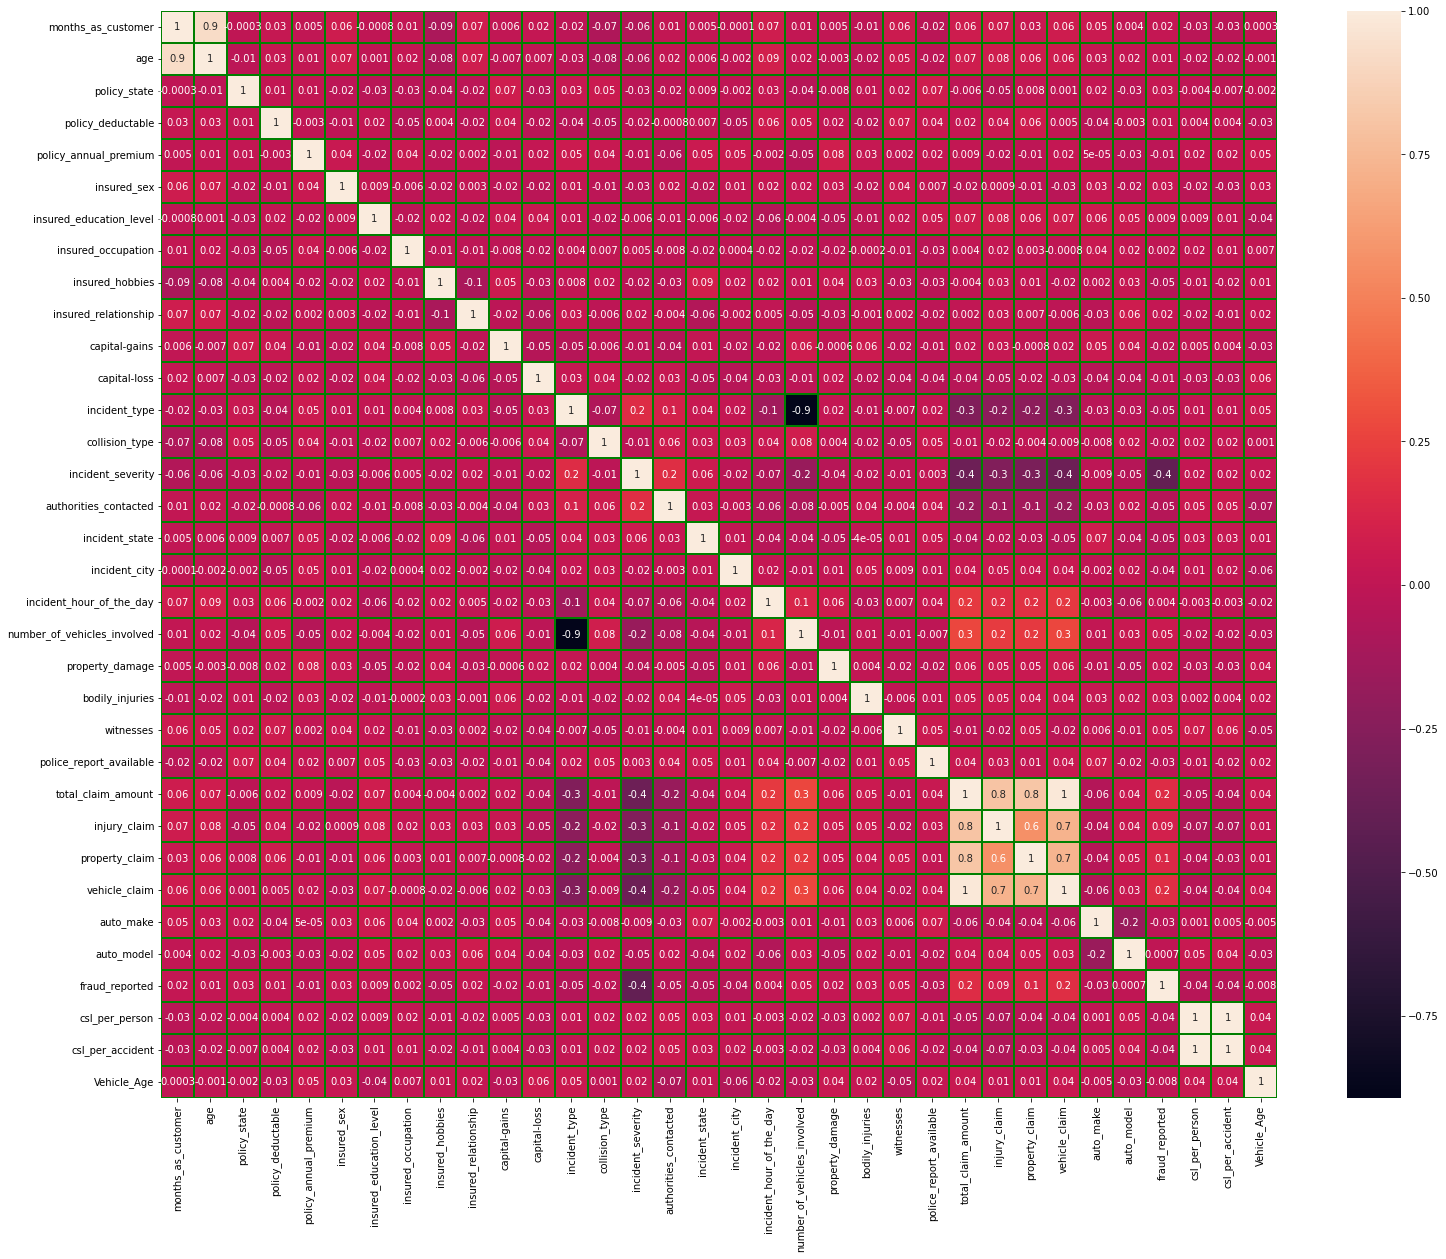

In [41]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=.1,fmt=".1g",linecolor="green",annot=True)
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat mapcontains both positive and negative correlation.
          
     1)There is very less correlation between the target and the label.
        
    2) We can observe the most of the columns are highly correlated with each other which leads to the multicollinearity problem

    3) We will check the VIF value to overcome with this multicollinearity problem.



### Visualizing correlation between label and features

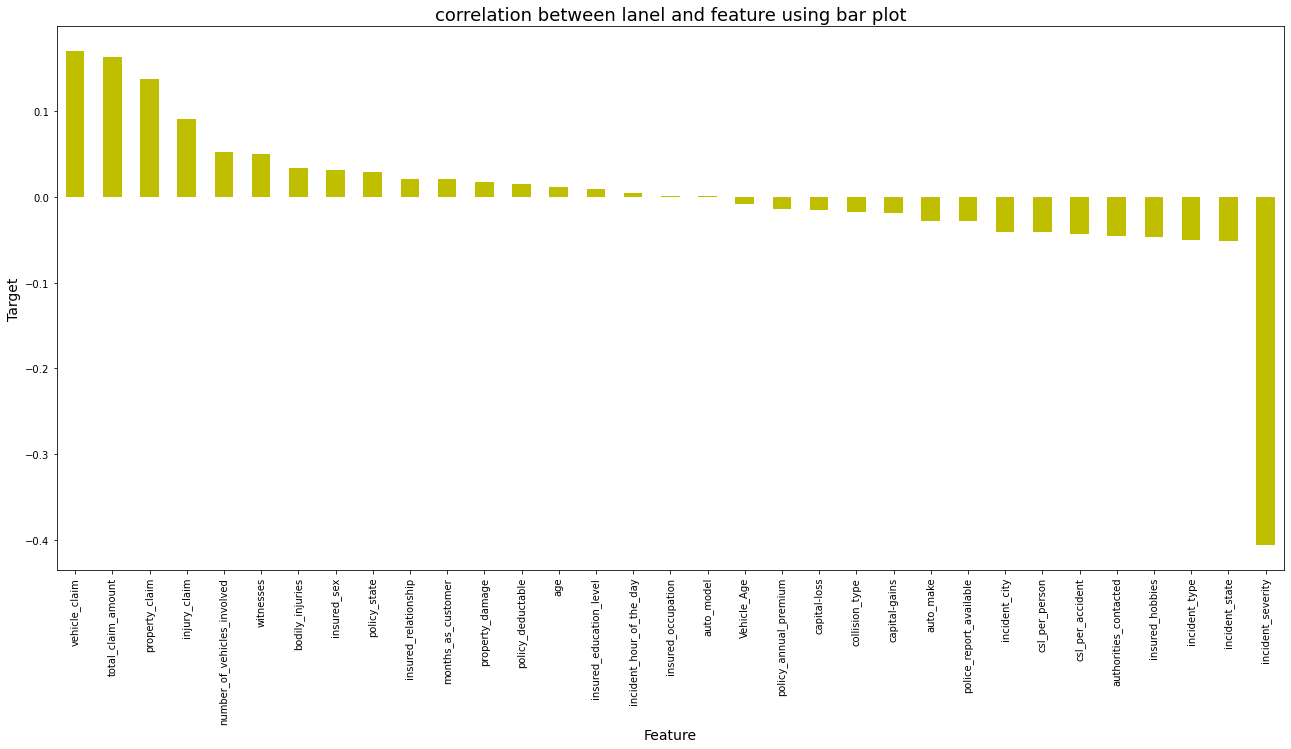

In [42]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can observe that the columns policy_bind_year,insured_occupation and auto_model age are very less correlated with the target. We can drop these columns if necessary.

# Checking Skewess

In [43]:
df_cont=df[numerical_col]
df_cont.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
csl_per_person                 0.410015
csl_per_accident               0.605587
Vehicle_Age                    0.048289
dtype: float64

Setting skewness limit to -0.65to +0.65

We can observe that all columns are under skewness limit .So we will not remove skewness


# Checking for Outliers

In [44]:
df_cont.shape

(1000, 17)

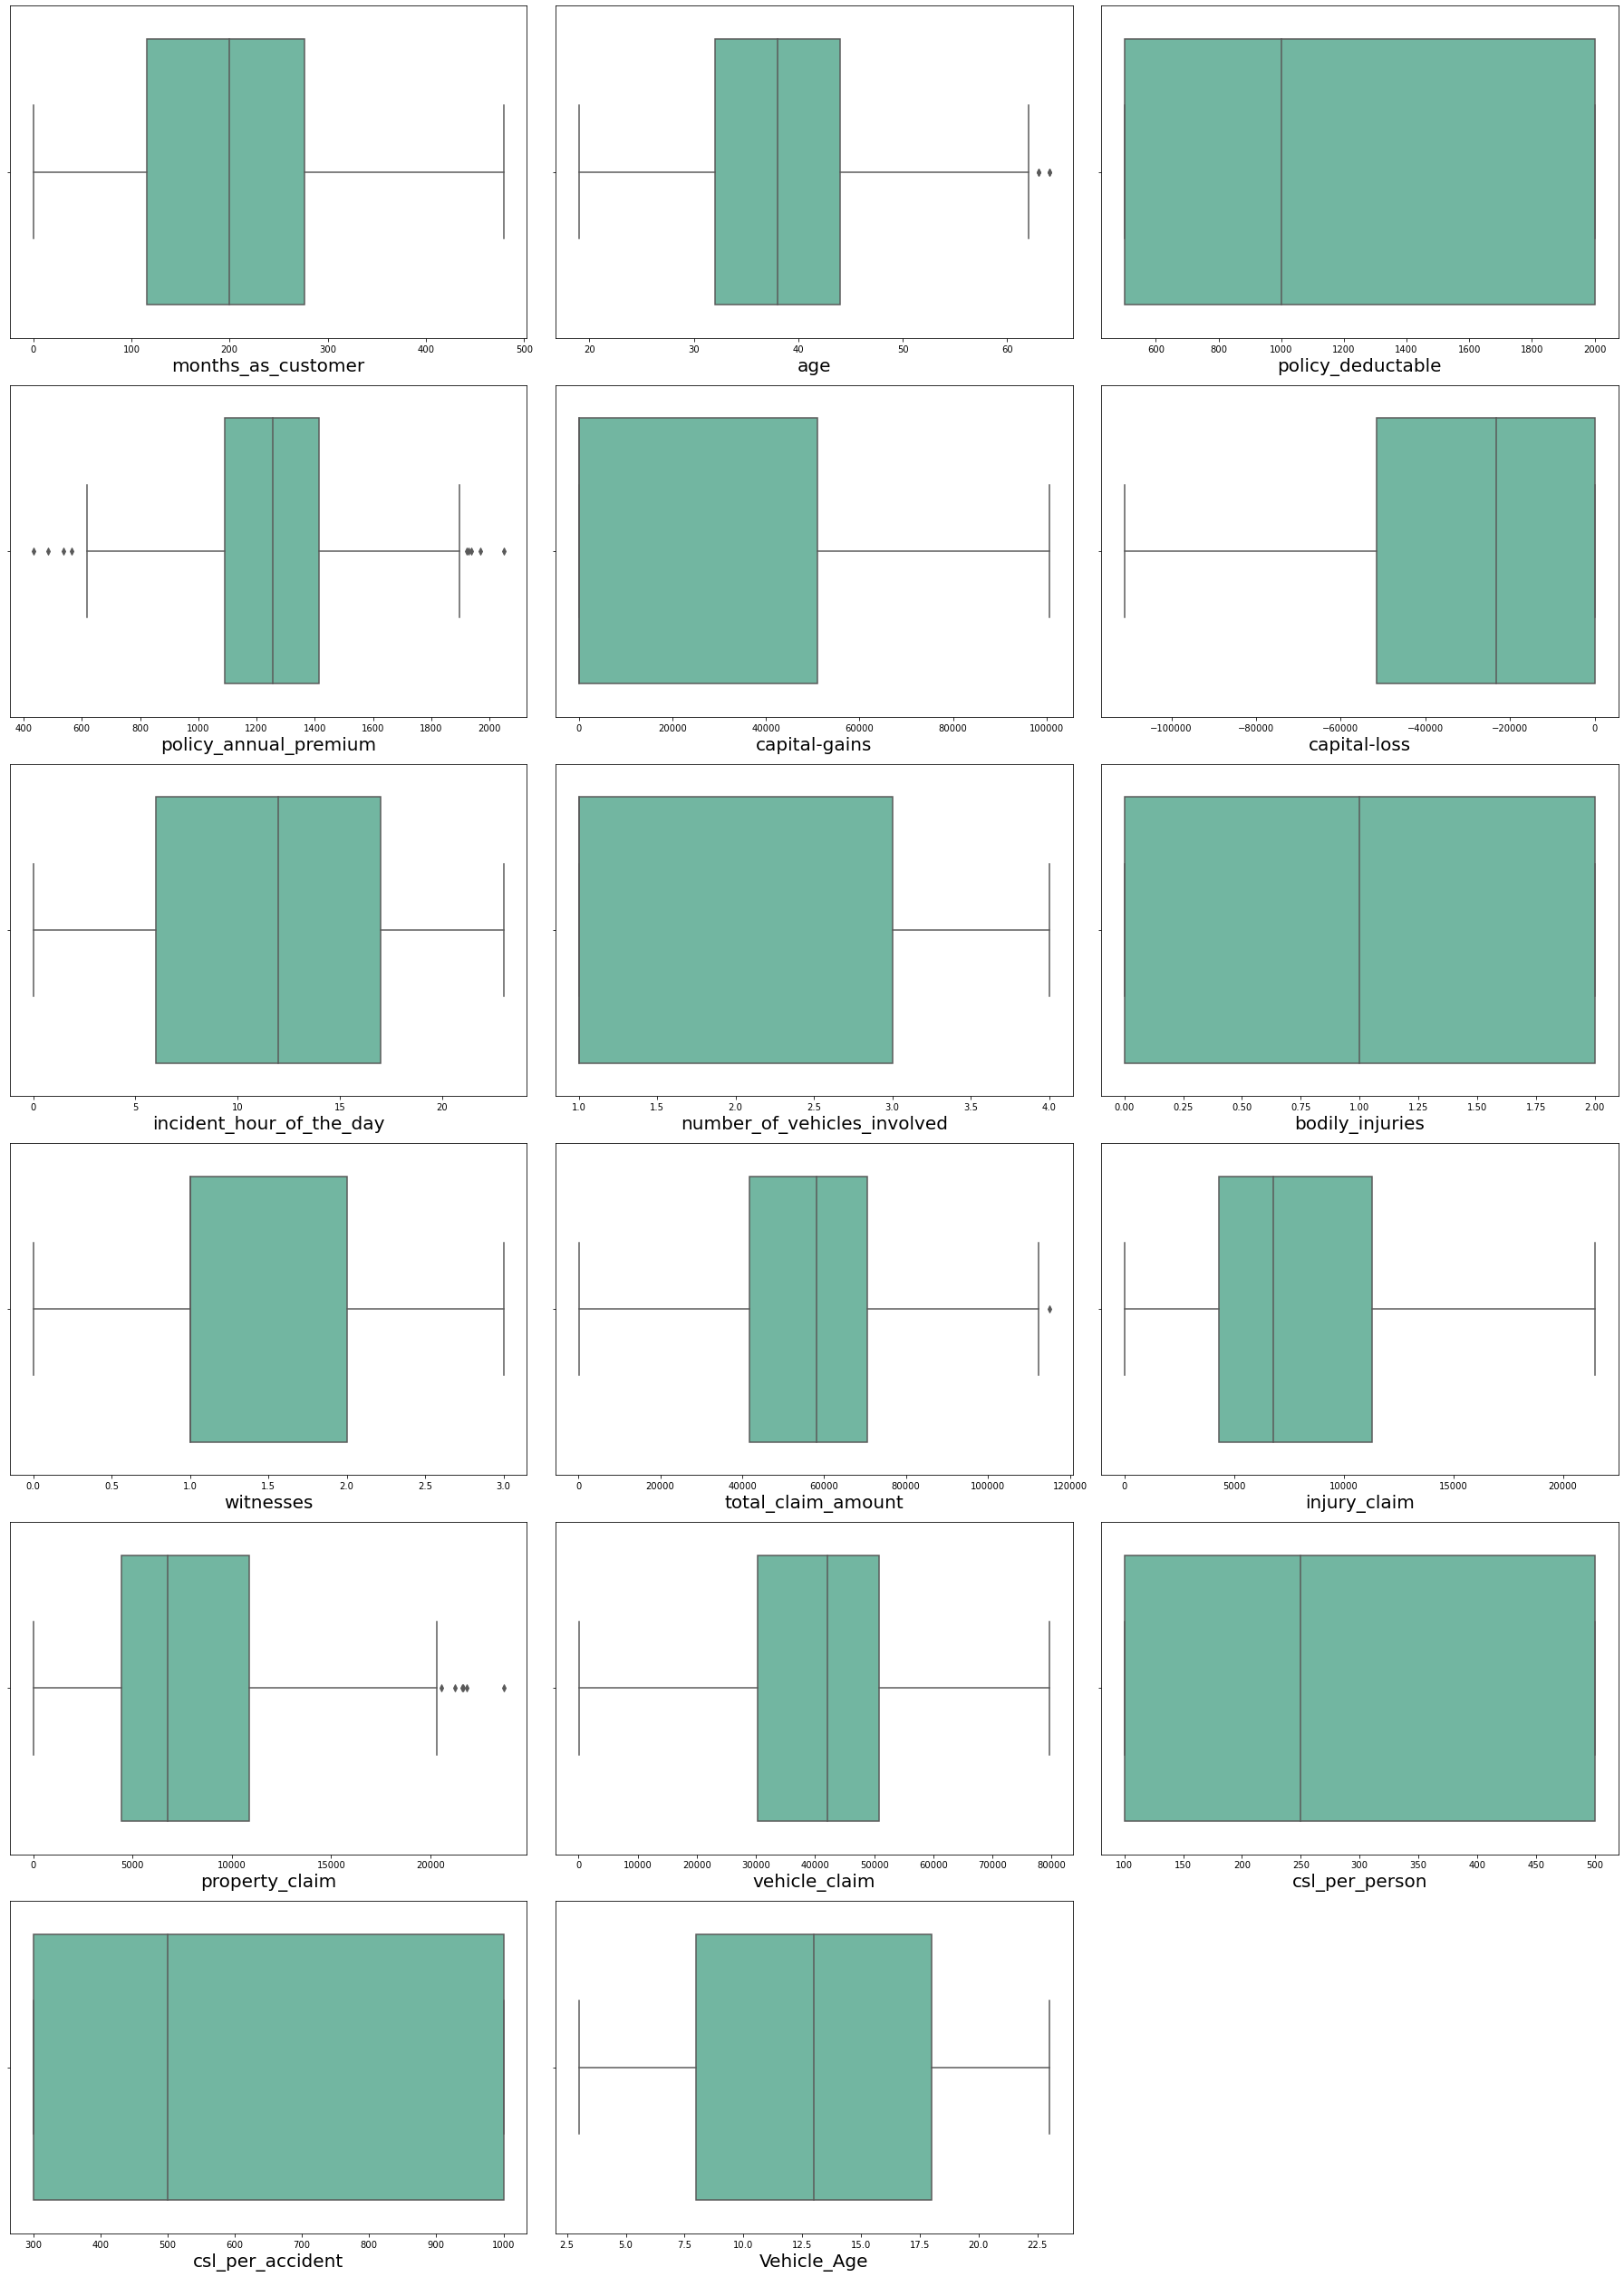

In [45]:
# Lets check the outliers by plotting boxplot
plt.figure(figsize=(25,35),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[col],palette="Set2")
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can find the outliers in the following columns:

age

policy_annual_premium

property_claim


# DataPreprocessing  

### Separating features and target variable as x and y

In [46]:
x = df.drop("fraud_reported", axis=1)
y = df["fraud_reported"]

# Removing Outliers

### Zscore method

In [47]:
# Features containing outliers
features = df[["age","policy_annual_premium","property_claim"]]
from scipy.stats import zscore
z = np.abs(zscore(features))
z

,age,policy_annual_premium,property_claim
0,0.990836,0.616705,1.165505
1,0.334073,0.242521,1.372696
2,1.088913,0.642233,0.736072
3,0.224613,0.652886,0.219722
4,0.552994,1.341980,1.399654
...,...,...,...
995,0.103769,0.222884,0.273817
996,0.224613,0.739141,2.214794
997,0.541611,0.520739,0.020826
998,2.523284,0.411866,0.451976


In [48]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,Vehicle_Age
0,328,48,2,1000,1406.91,1,4,2,17,0,...,71610,6510,13020,52080,10,1,1,250,500,14
1,228,42,1,2000,1197.22,1,4,6,15,2,...,5070,780,780,3510,8,12,1,250,500,11
2,134,29,2,2000,1413.14,0,6,11,2,3,...,34650,7700,3850,23100,4,30,0,100,300,11
3,256,41,0,2000,1415.74,0,6,1,2,4,...,63400,6340,6340,50720,3,34,1,250,500,4
4,228,44,0,1000,1583.91,1,0,11,2,4,...,6500,1300,650,4550,0,31,0,500,1000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,5,2,13,4,...,87200,17440,8720,61040,6,6,0,500,1000,12
996,285,41,0,1000,1436.79,0,6,9,17,5,...,108480,18080,18080,72320,13,28,0,100,300,3
997,130,34,2,500,1383.49,0,5,1,3,2,...,67500,7500,7500,52500,11,19,0,250,500,22
998,458,62,0,2000,1356.92,1,0,5,0,5,...,46980,5220,5220,36540,1,5,0,500,1000,20


In [49]:
# Checking data loss
loss = (1000-996)/1000*100
loss

0.4

### Separating features and target variable as x and y

In [50]:
x = df.drop("fraud_reported", axis=1)
y = df["fraud_reported"]

In [51]:
print(x.shape)
print(y.shape)

(1000, 33)
(1000,)


# Handling imbalanced dataset

In [52]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

We can observe that dataset is imbalanced , we need to balance it

### Over sampling using SMOTE

In [53]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split

In [54]:
from imblearn.over_sampling import SMOTE

over_smpl=SMOTE(0.8)
x,y=over_smpl.fit_resample(x,y)

y.value_counts()

0    753
1    602
Name: fraud_reported, dtype: int64

# Data Standardisation

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,csl_per_person,csl_per_accident,Vehicle_Age
0,1.116586,1.044281,1.306929,-0.237011,0.651196,1.204272,0.604943,-1.187116,1.387324,-1.440317,...,1.701081,0.678853,-0.228357,1.144498,0.707110,0.956381,-1.707163,-0.120970,-0.267314,0.234114
1,0.214040,0.365732,0.061578,1.455148,-0.240927,1.204272,0.604943,-0.140058,1.018225,-0.204326,...,-0.587861,-1.991843,-1.456357,-1.481114,-2.009161,0.432363,-0.670907,-0.120970,-0.267314,-0.283944
2,-0.634353,-1.104457,1.306929,1.455148,0.677702,-0.830377,1.670870,1.168763,-1.380923,0.413669,...,-0.587861,-0.804600,0.026673,-0.822566,-0.913593,-0.615673,1.024785,-1.104375,-1.005172,-0.283944
3,0.466753,0.252640,-1.183773,1.455148,0.688764,-0.830377,1.670870,-1.448880,-1.380923,1.031665,...,-0.587861,0.349331,-0.264790,-0.288434,0.631052,-0.877681,1.401605,-0.120970,-0.267314,-1.492747
4,0.214040,0.591915,-1.183773,-0.237011,1.404241,1.204272,-1.526911,1.168763,-1.380923,1.031665,...,-0.587861,-1.934448,-1.344915,-1.509001,-1.950999,-1.663708,1.118990,1.518038,1.577330,-0.629317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,-1.148805,-0.991365,0.061578,-0.215013,1.268824,1.204272,1.137907,0.645235,-1.380923,-0.204326,...,-0.587861,0.037509,-0.538250,0.524133,0.056033,-0.353664,-1.141933,-0.140638,-0.278382,-0.802003
1351,0.863873,0.818098,1.306929,-1.083090,-0.912114,-0.830377,-1.526911,0.645235,1.387324,0.413669,...,-0.587861,0.552422,1.044005,0.144663,0.459531,-1.401699,-1.424548,-0.212754,-0.123432,0.061428
1352,0.557008,0.591915,0.061578,0.994881,-0.488668,1.204272,-0.460984,-1.187116,-0.458174,1.031665,...,-0.587861,0.627358,0.043175,0.871640,0.635582,0.956381,-0.199882,1.039448,1.108791,-1.147375
1353,-1.518849,-0.991365,-1.183773,1.455148,0.302301,-0.830377,-0.460984,-0.401823,0.649125,-1.440317,...,-0.587861,-0.140016,0.520016,0.539792,-0.471619,-1.139690,1.495810,-0.193086,-0.318964,-1.492747


# Check for multicollierinity

In [57]:
# Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,7.168451e+00,months_as_customer
1,7.223060e+00,age
2,1.048618e+00,policy_state
3,1.045750e+00,policy_deductable
4,1.032971e+00,policy_annual_premium
5,1.050959e+00,insured_sex
6,1.036566e+00,insured_education_level
7,1.020608e+00,insured_occupation
8,1.069426e+00,insured_hobbies
9,1.047117e+00,insured_relationship


In [58]:
# Dropping total_claim_amount column 
x.drop(['total_claim_amount'],axis=1,inplace=True)

In [59]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,7.156347,months_as_customer
1,7.199438,age
2,1.044702,policy_state
3,1.045452,policy_deductable
4,1.030545,policy_annual_premium
5,1.042944,insured_sex
6,1.033849,insured_education_level
7,1.018738,insured_occupation
8,1.068941,insured_hobbies
9,1.045433,insured_relationship


Since we have high vif value in csl_per_person and csl_per_accident. Lets remove csl_per_accident column as it has high vif value greater than csl_per_person.

In [60]:
# Dropping csl_per_accident column
x.drop("csl_per_accident",axis=1,inplace=True)

In [61]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,7.156345,months_as_customer
1,7.198718,age
2,1.043532,policy_state
3,1.045448,policy_deductable
4,1.027722,policy_annual_premium
5,1.037650,insured_sex
6,1.033648,insured_education_level
7,1.017415,insured_occupation
8,1.067719,insured_hobbies
9,1.043742,insured_relationship


Now the multicolineraity problem has been resolved.

# Modeling

### Finding the best random state

In [63]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.30,random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random state",maxRS)

Best accuracy is  0.8845208845208845 at random state 85


### Creating train test split


In [64]:
x_train,x_test,y_train,y_test=TTS(x,y,test_size=.30,random_state=maxRS)


# Classification Algorithms

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [66]:
# Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8968058968058968
[[205  17]
 [ 25 160]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       222
           1       0.90      0.86      0.88       185

    accuracy                           0.90       407
   macro avg       0.90      0.89      0.90       407
weighted avg       0.90      0.90      0.90       407



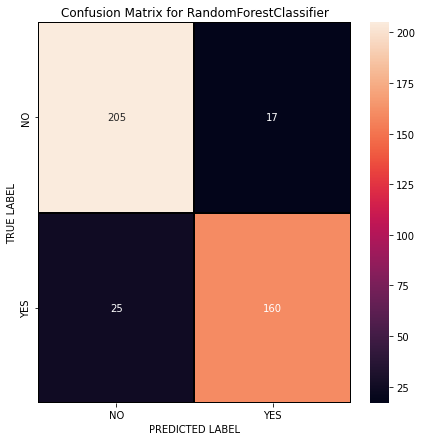

In [67]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Support Vector Machine Classifier

In [68]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8353808353808354
[[194  28]
 [ 39 146]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       222
           1       0.84      0.79      0.81       185

    accuracy                           0.84       407
   macro avg       0.84      0.83      0.83       407
weighted avg       0.84      0.84      0.83       407



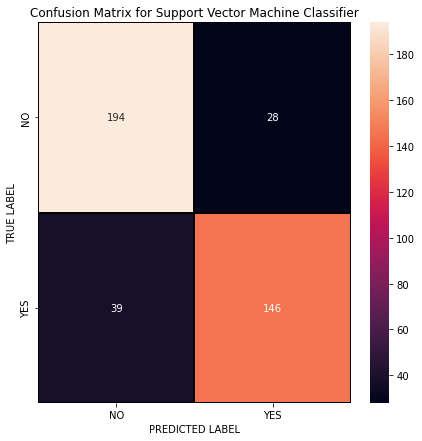

In [69]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# GradientBoostingClassifier

In [70]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8918918918918919
[[199  23]
 [ 21 164]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       222
           1       0.88      0.89      0.88       185

    accuracy                           0.89       407
   macro avg       0.89      0.89      0.89       407
weighted avg       0.89      0.89      0.89       407



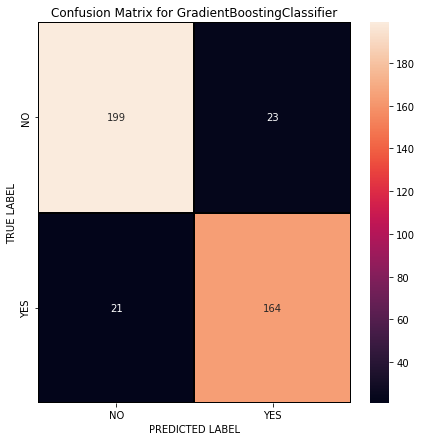

In [71]:
# Lets plot confusion matrix for GradientBoostingClassifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.show()

# AdaBoostClassifier

In [72]:
# Checking accuracy for AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8845208845208845
[[201  21]
 [ 26 159]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       222
           1       0.88      0.86      0.87       185

    accuracy                           0.88       407
   macro avg       0.88      0.88      0.88       407
weighted avg       0.88      0.88      0.88       407



Text(0.5, 1.0, 'Confusion Matrix for AdaBoostClassifier')

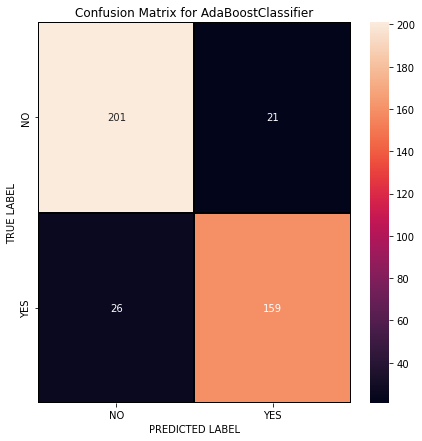

In [73]:
# Lets plot confusion matrix for AdaBoostClassifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoostClassifier')

# XG Boost Classifier

In [74]:
# Checking accuracy for XGBClassifier
XGB = xgb(verbosity=0)
XGB.fit(x_train,y_train)
predXGB = XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

0.9017199017199017
[[199  23]
 [ 17 168]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       222
           1       0.88      0.91      0.89       185

    accuracy                           0.90       407
   macro avg       0.90      0.90      0.90       407
weighted avg       0.90      0.90      0.90       407



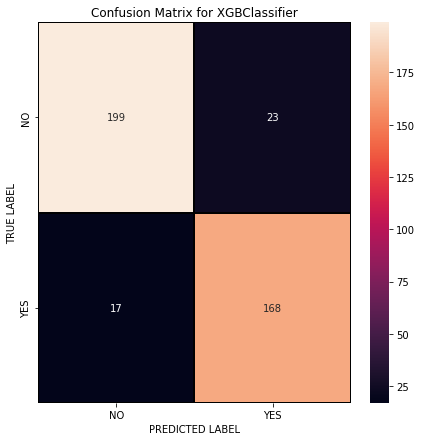

In [75]:
# Lets plot confusion matrix for XGBClassifier
cm = confusion_matrix(y_test,predXGB)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

# Cross Validation Score

In [76]:
from sklearn.model_selection import cross_val_score

lssscore_selected=cross_val_score(svc,x,y,cv=5).mean()
print("the cross validation score for SVM is ",lssscore_selected)

lssscore_selected=cross_val_score(RFC,x,y,cv=5).mean()
print("the cross validation score for Random Forest is ",lssscore_selected)


lssscore_selected=cross_val_score(GB,x,y,cv=5).mean()
print("the cross validation score for GRadient Boost is ",lssscore_selected)

lssscore_selected=cross_val_score(ABC,x,y,cv=5).mean()
print("the cross validation score for Ada Boost is ",lssscore_selected)

lssscore_selected=cross_val_score(XGB,x,y,cv=5).mean()
print("the cross validation score for XGB is ",lssscore_selected)

the cross validation score for SVM is  0.7904059040590405
the cross validation score for Random Forest is  0.8383763837638376
the cross validation score for GRadient Boost is  0.8420664206642066
the cross validation score for Ada Boost is  0.8332103321033211
the cross validation score for XGB is  0.8693726937269373


# Conclusion 

We can observe that at random state 85 and cv=5

SVM

------Testing Accuracy:84.42 and Cross val score:79.04--------

Random Forest

------Testing Accuracy:90.00 and Cross val score:83.83--------


ADA Boosting

------ Testing Accuracy:88.65 and Cross val score:83.32--------

X Gradient Boost

------ Testing Accuracy:90.00 and Cross val score:86.93--------

Gradient Boosting Tree

------- Testing Accuracy:90.46 and Cross val score:84.20--------

# Plotting ROC and compare AUC for all the models used

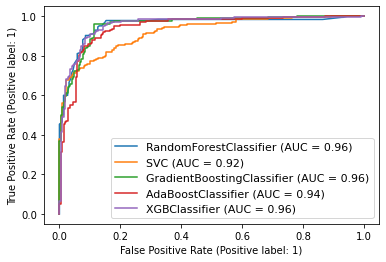

In [78]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(RFC,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

### We can observe that Gradient Boosting Trees is best fit model as it has highest testing accuracy and least difference between testing accuracy and cross validation score

# Hyperparameter Tuning

In [82]:
# Gradient Boosting Trees
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators":[10,20,30,40,50],
    'learning_rate':[0.1,1.0,10],'random_state':[10,20,30,40,50,60,70,80,90]}

In [83]:
GCV = GridSearchCV(AdaBoostClassifier(),parameters,cv=5)


In [84]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 1.0, 10],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'random_state': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

In [85]:
GCV.best_params_


{'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 10}

In [86]:
Final_model=AdaBoostClassifier(learning_rate=1,n_estimators=50,random_state=10)

In [88]:
Final_model.fit(x_test,y_test)
predFianl = Final_model.predict(x_test)
print(accuracy_score(y_test,predFianl))

0.9582309582309583


In [89]:
print(classification_report(y_test,predFianl))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       222
           1       0.96      0.95      0.95       185

    accuracy                           0.96       407
   macro avg       0.96      0.96      0.96       407
weighted avg       0.96      0.96      0.96       407



In [90]:
lssscore_selected=cross_val_score(Final_model,x,y,cv=5).mean()
print("the cross validation score for Final Model is ",lssscore_selected)

the cross validation score for Final Model is  0.8332103321033211


# Saving the best model

In [92]:
import pickle
pickle.dump(Final_model,open('classmodel_Fraud_insurance','wb'))